In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

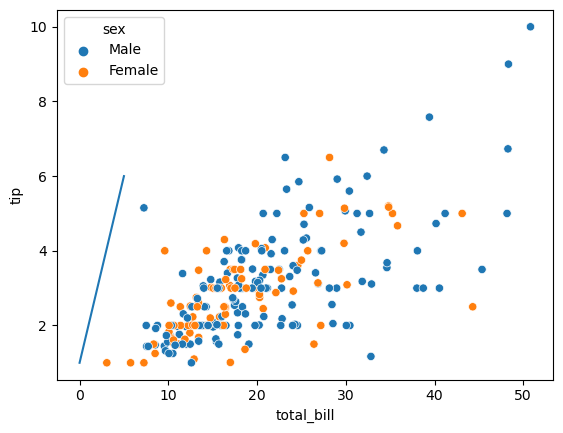

In [12]:
tips=sns.load_dataset('tips')

fig, ax=plt.subplots()
ax.plot([1,2,3,4,5,6])
sns.scatterplot(x='total_bill', y='tip', hue='sex',ax=ax, data=tips)
plt.savefig('output/res.png')
plt.show()

## matplotlib 과 seaborn을 동시에 사용한 subplotting 기법
- 다중 차트를 하나의 그림에 그리겠다.

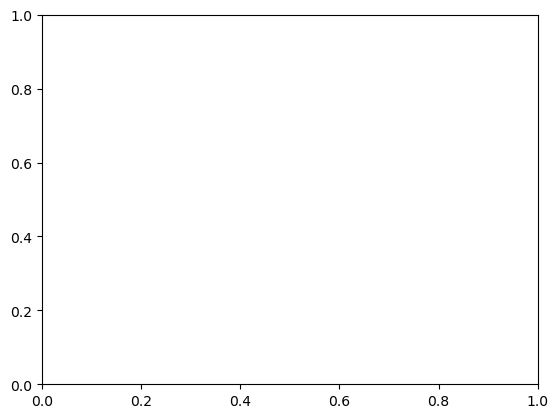

In [14]:
fig, ax =plt.subplots()

plt.show()

## 산점도 그래프
- x축과 y축 데이터는 연속형 데이터가 와야한다.

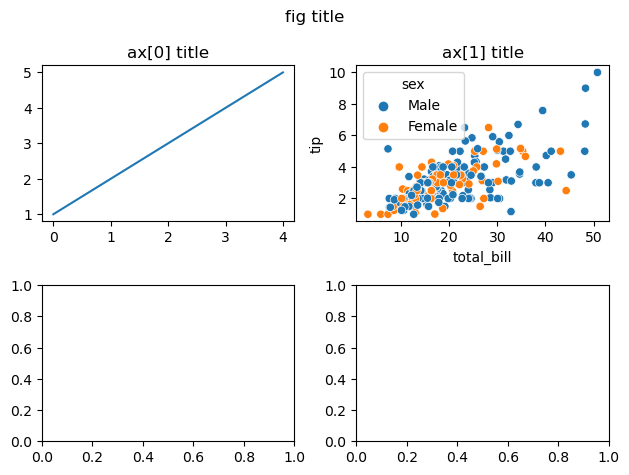

In [34]:
fig, ax =plt.subplots(nrows=2,ncols=2)

ax[0,0].set_title('ax[0] title')
ax[0,0].plot([1,2,3,4,5])
ax[0,1].set_title('ax[1] title')
sns.scatterplot(x='total_bill', y='tip', hue='sex',ax=ax[0,1], data=tips)

fig.suptitle('fig title')
plt.tight_layout()

plt.show()

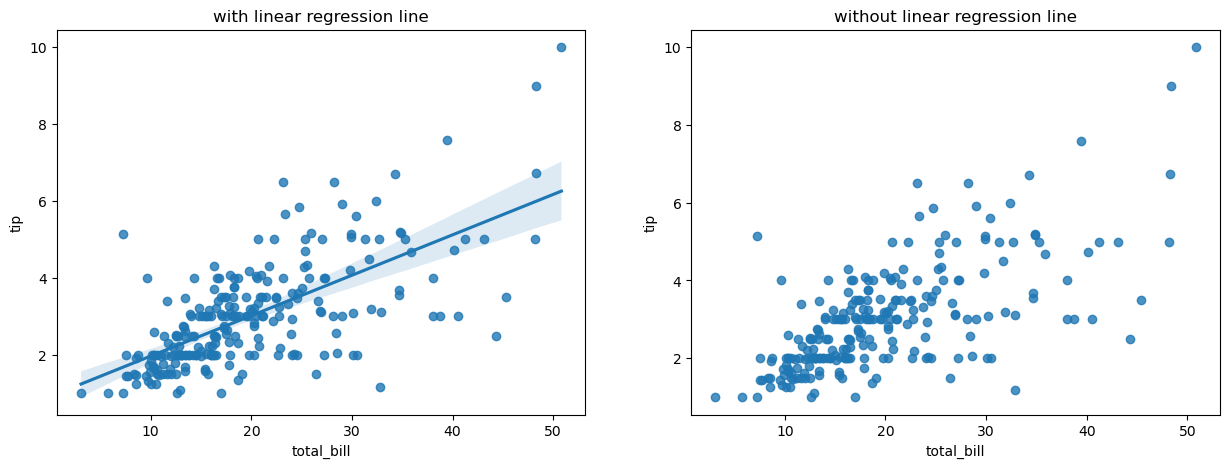

In [44]:
fig, ax=plt.subplots(1, 2, figsize=(15, 5))

sns.regplot(x="total_bill", y="tip", data=tips, ax=ax[0], fit_reg=True)
ax[0].set_title('with linear regression line')

sns.regplot(x="total_bill", y="tip", data=tips, ax=ax[1], fit_reg=False)
ax[1].set_title('without linear regression line')

plt.show()
#해석하는 능력이 필요함.
#데이터 같은경우 우상향하는 경향이 있으며, total_bill이 높을 수록 데이터의 분산도 커지는 경향이 있음

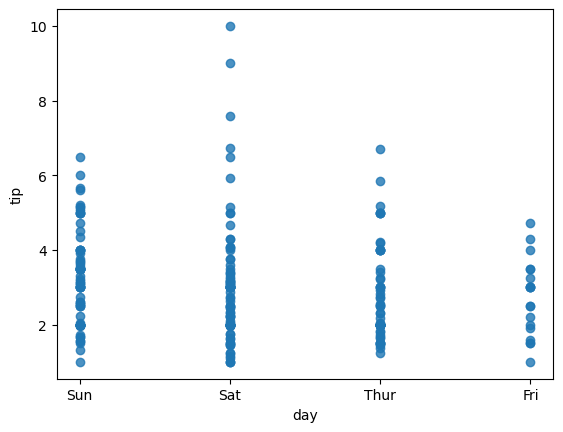

In [48]:
fig,ax=plt.subplots()
sns.regplot(x='day',y='tip',data=tips,ax=ax,fit_reg=False)
plt.show()

In [51]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

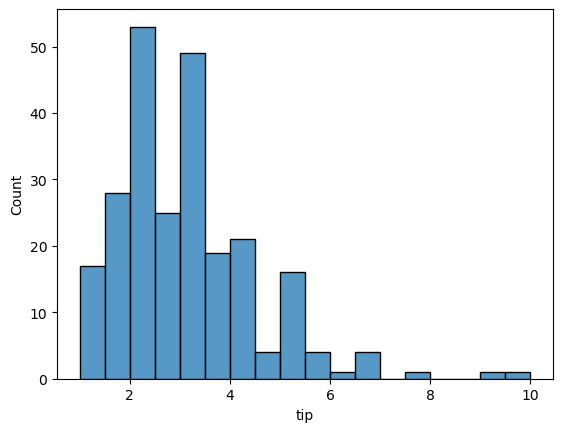

In [52]:
fig, ax =plt.subplots()
#sns.distplot(x='tip',ax=ax,data=tips)
sns.histplot(x='tip',ax=ax,data=tips)
plt.show()

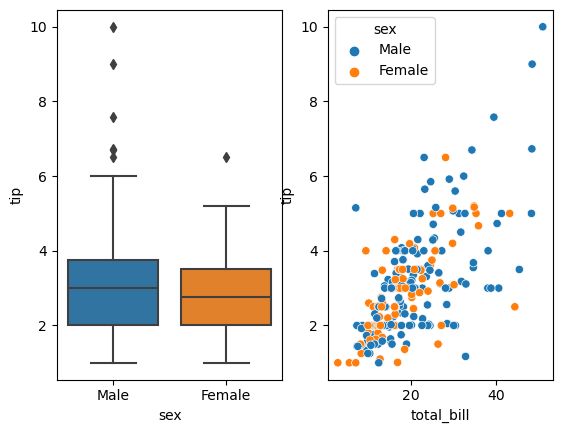

In [55]:
fig, ax =plt.subplots(nrows=1,ncols=2)

sns.boxplot(x='sex',y='tip',ax=ax[0],data=tips)
sns.scatterplot(x='total_bill',y='tip',hue='sex',ax=ax[1],data=tips)
plt.show()

In [57]:
import warnings

# 경고메세지 끄기
warnings.filterwarnings(action='ignore')

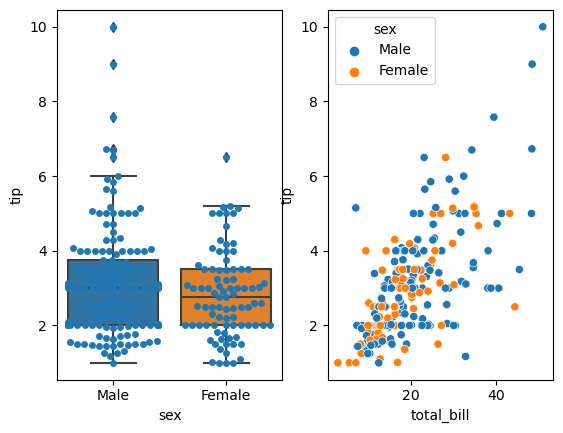

In [58]:
fig, ax =plt.subplots(nrows=1,ncols=2)

sns.boxplot(x='sex',y='tip',ax=ax[0],data=tips)
sns.swarmplot(x='sex',y='tip',ax=ax[0],data=tips)
sns.scatterplot(x='total_bill',y='tip',hue='sex',ax=ax[1],data=tips)
plt.show()

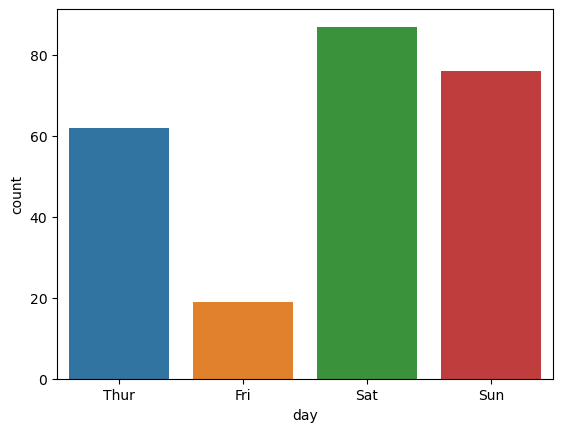

In [61]:
fig, ax=plt.subplots()

sns.countplot(x='day',ax=ax,data=tips)
plt.show()

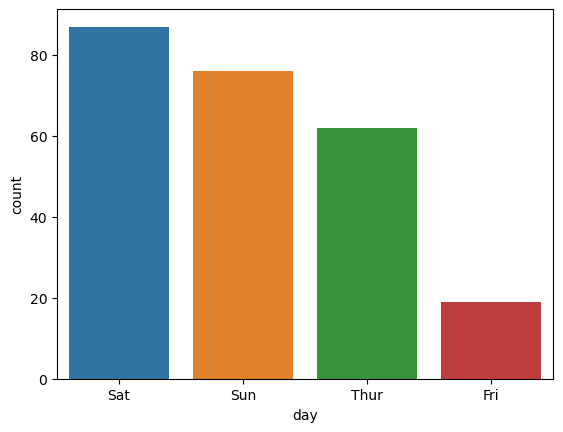

In [66]:
fig, ax=plt.subplots()

sns.countplot(x='day',ax=ax,data=tips,order=tips['day'].value_counts().index)
plt.show()

## Spines & Grids

### 라이브러리 가져오기
- https://jehyunlee.github.io/2020/08/27/Python-DS-28-mpl_spines_grids/

In [68]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter) #축 설정
import seaborn as sns
import numpy as np

### 데이터 불러오기

In [70]:
tips=sns.load_dataset('tips')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [73]:
# y축 설정할때, 값을 소수점 2자리까지 표현
def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

### 객체지향선언

Text(0, 0, 'Thur')
Text(1, 0, 'Fri')
Text(2, 0, 'Sat')
Text(3, 0, 'Sun')


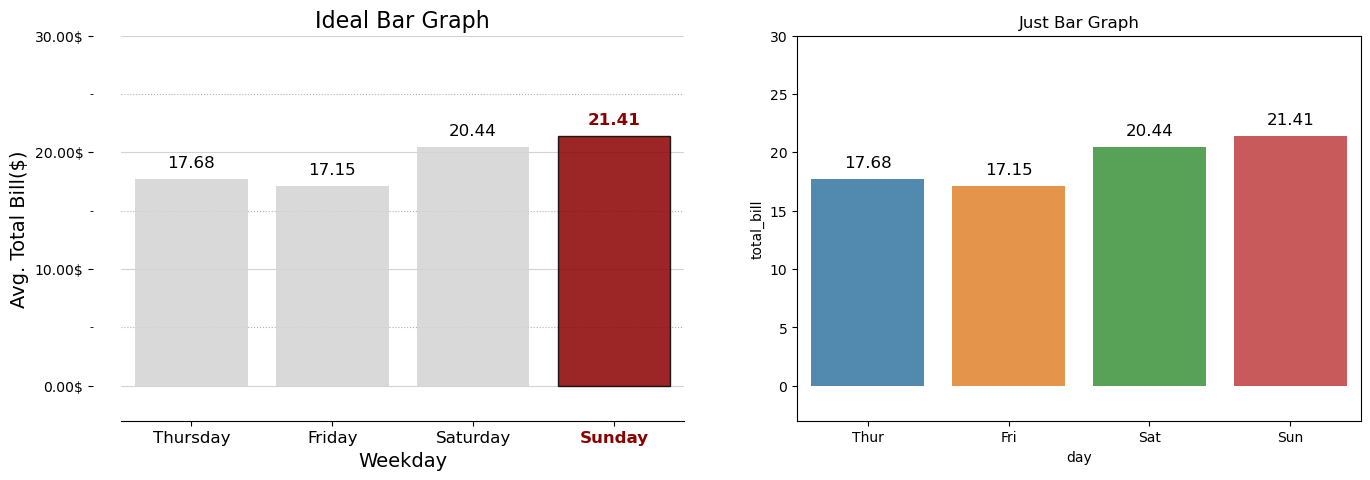

In [92]:
fig, ax =plt.subplots(nrows=1,ncols=2,figsize=(16,5))

#이상적인 막대그래프
ax0 = sns.barplot(x = "day", y = 'total_bill', data = tips,
                errorbar=None,color='lightgray', zorder=2,alpha=0.85, ax=ax[0])#,zorder=2)

group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0] #해당되는 결과값의 가장 큰 값의 인덱스 요일을 가져옴
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2) #해당되는 결과값의 최댓값을 가져옴
for p in ax0.patches:
  fontweight = "normal"
  color = "k"
  height = np.round(p.get_height(), 2)
  if h_mean == height:
    fontweight="bold"
    color="darkred"
    p.set_facecolor(color)
    p.set_edgecolor("black")
  ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center',
           size=12,
           fontweight=fontweight, color=color)
    
#y축 범위 지정 옵션
ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size = 16)

#가로세로 축, 일부 수정 및 변셩
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

#y축 값 변경
ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

#y축 라벨 변경
ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

#y축 Grid라인 수정
ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

#X축 값을 변경
ax0.set_xlabel("Weekday", fontsize=14)
for xtick in ax0.get_xticklabels():
  print(xtick)
  if xtick.get_text() == h_day:
    xtick.set_color("darkred")
    xtick.set_fontweight("demibold")
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)
    
#일반 막대그래프
ax1 = sns.barplot(x = "day", y = 'total_bill', data = tips,
                  errorbar=None, alpha=0.85,
                  ax=ax[1])
for p in ax1.patches:
  height = np.round(p.get_height(), 2)
  ax1.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12)
ax1.set_ylim(-3, 30)
ax1.set_title("Just Bar Graph")

plt.show()